In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [89]:
df1 = pd.read_csv('downloads/train_values.csv')
df2 = pd.read_csv('downloads/train_labels.csv')
df = df1.merge(df2, on= 'building_id')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [91]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [92]:
df.drop(['legal_ownership_status'], axis = 1,inplace=True)

In [93]:
df.land_surface_condition.unique()

array(['t', 'o', 'n'], dtype=object)

In [94]:
df["land_surface_condition"] = df["land_surface_condition"].map({'t' : 1,'o': 2, 'n': 3})

In [95]:
df.foundation_type.unique()

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [96]:
df["foundation_type"] = df["foundation_type"].map({'r' : 1,'w': 2, 'i': 3, 'u': 4, 'h':5})

In [97]:
df.roof_type.unique()

array(['n', 'q', 'x'], dtype=object)

In [98]:
df["roof_type"] = df["roof_type"].map({'n' : 1,'q': 2, 'x': 3})

In [99]:
df.ground_floor_type.unique()

array(['f', 'x', 'v', 'z', 'm'], dtype=object)

In [100]:
df["ground_floor_type"] = df["ground_floor_type"].map({'f' : 1,'x': 2, 'v': 3, 'z': 4, 'm':5})

In [101]:
df.other_floor_type.unique()

array(['q', 'x', 'j', 's'], dtype=object)

In [102]:
df["other_floor_type"] = df["other_floor_type"].map({'q' : 1,'x': 2, 'j': 3, 's': 4})

In [103]:
df["plan_configuration"] = df["plan_configuration"].map({'a' : 1,'c': 2, 'd': 3, 'f': 4, 'm': 5, 'n': 6, 'o': 7, 'q': 8, 's': 9, 'u': 10})

In [104]:
df["position"] = df["position"].map({'j' : 1,'o': 2, 's': 3, 't': 4})

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int64
 9   foundation_type                         260601 non-null  int64
 10  roof_type                               260601 non-null  int64
 11  

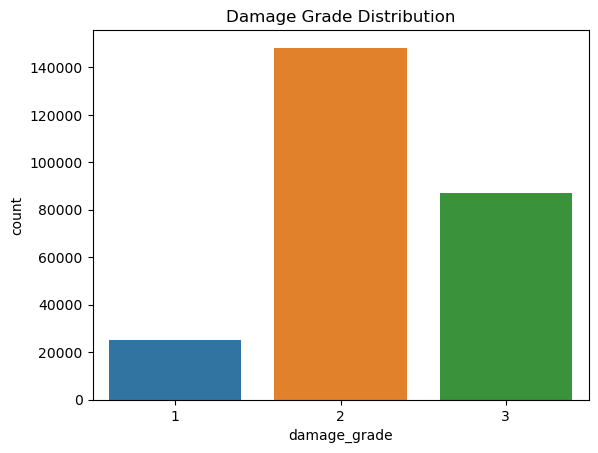

In [106]:
sn.countplot(x="damage_grade", data=df2)
plt.title("Damage Grade Distribution")
plt.show()

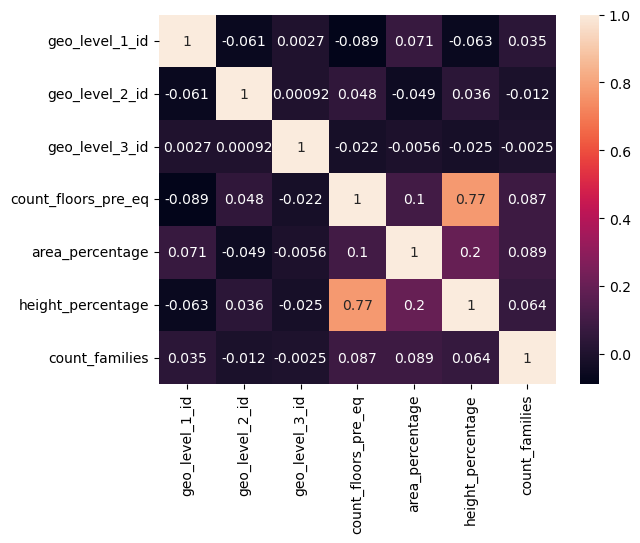

In [107]:
selected_columns = df[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'area_percentage',
                      'height_percentage','count_families']]
c_matrix = selected_columns.corr()
sn.heatmap(c_matrix, annot=True)
plt.show()

# damage_corr = c_matrix['damage_grade']
# high_corr_vars = damage_corr[damage_corr.abs() >0.1]
# high_corr_vars = high_corr_vars[high_corr_vars.index != 'damage_grade']

# print(high_corr_vars)

In [108]:
X_train = df.drop(columns=["damage_grade"])
Y_train = df["damage_grade"]

In [109]:
# selector = SelectKBest(score_func=chi2, k='all')
# selector.fit(X_train, Y_train)
# selected_features = X_train.columns[selector.get_support()]
# print(selected_features)
# model = LogisticIT()
# model.fit(X_train[selected_features], Y_train)

In [110]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]

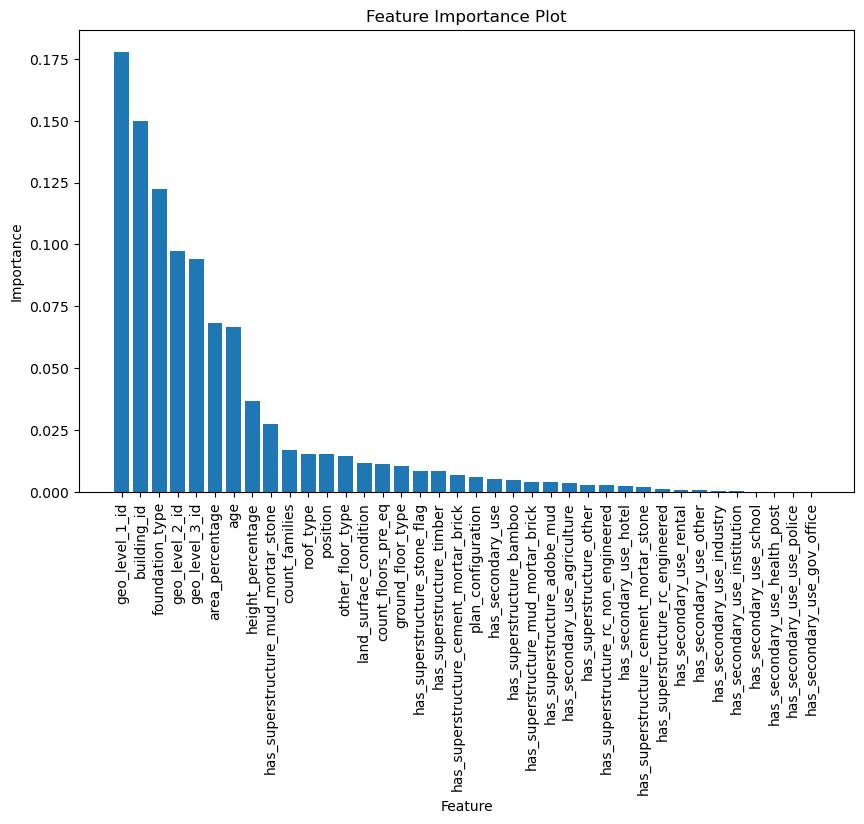

In [111]:
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.show()

In [112]:
df.drop(['has_secondary_use_other','has_secondary_use_use_police', 'has_secondary_use_gov_office', 'has_secondary_use_health_post', 'has_secondary_use_industry','has_secondary_use_school', 'has_secondary_use_institution','has_secondary_use_rental','has_secondary_use_hotel','has_secondary_use_agriculture','has_secondary_use','has_superstructure_rc_engineered','has_superstructure_cement_mortar_stone','has_superstructure_rc_non_engineered',
         'has_superstructure_other','has_superstructure_adobe_mud','has_superstructure_mud_mortar_brick','has_superstructure_bamboo','has_superstructure_cement_mortar_brick','plan_configuration','has_superstructure_stone_flag','count_floors_pre_eq','has_superstructure_timber'], axis = 1,inplace=True)

In [113]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,count_families,damage_grade
0,802906,6,487,12198,30,6,5,1,1,1,1,1,4,1,1,3
1,28830,8,900,2812,10,8,7,2,1,1,2,1,3,1,1,2
2,94947,21,363,8973,10,5,5,1,1,1,1,2,4,1,1,3
3,590882,22,418,10694,10,6,5,1,1,1,1,2,3,1,1,2
4,201944,11,131,1488,30,8,9,1,1,1,1,2,3,0,1,3


In [115]:
columns_to_normalize = [
    'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
    'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
    'other_floor_type', 'position', 'has_superstructure_mud_mortar_stone', 'count_families']

# Normalize the selected columns
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
df.describe()

In [116]:
X = df.drop(columns=["damage_grade"])
Y = df["damage_grade"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 200)

In [117]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [118]:
scores = cross_val_score(nb, X_test, Y_test, cv=10)
# print('Scores:', scores)
print("Naive Bayes score: ",nb.score(X_test, Y_test))
print('Accuracy:', scores.mean()*100)

Naive Bayes score:  0.4384029469887377
Accuracy: 44.13193321378059


In [120]:
# Make predictions on the test set
Y_pred = nb.predict(X_test)

# Calculate the F1 score
f1 = f1_score(Y_test, Y_pred, average='weighted')

# print("Naive Bayes score: ",nb.score(X_test, Y_test))
# print('Accuracy:', scores.mean()*100)
print('F1 Score:', f1)

F1 Score: 0.41379858266737474


In [121]:
classifier = SVC(kernel = 'linear', random_state = 0)

In [122]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [123]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
# confusion = confusion_matrix(Y_test, y_pred)
# report = classification_report(Y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:")
# print(report)